### Exercise 3: Counting Facebook comments
Start with spliting the train data in a train set and a validation set for hyperparameter tuning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from utils import A3

train_data = np.loadtxt('data/fbtrain.csv', delimiter=',')
test_data = np.loadtxt('data/fbtest.csv', delimiter=',')
X, y = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Used for plotting the max_depth result
max_depths =np.linspace(1, 10, num=10, endpoint=True)


 Restricting to cases when h = 24

In [2]:
new_X_train, new_y_train = A3.restrict_cases(X_train, y_train)
new_X_test, new_y_test = A3.restrict_cases(X_test, y_train)

# Train and validation set with restriction h = 24
new_X_train, new_X_val, new_y_train, new_y_val = train_test_split(new_X_train, new_y_train, test_size=0.2, random_state=42)

Used to plot the function max_depth over MSE score. To get a visual of the best parmeter for max_depth

In [7]:
def plot_MSE_Max_depth():
    plt.figure(1,figsize=(12,6))
    plt.plot(max_depths, train_results, 'r', label='Train MSE')
    plt.plot(max_depths, val_results, 'b', label='Validation MSE')
    plt.legend()
    plt.ylabel('MSE score')
    plt.xlabel('Depth')
    

Tunning the Decision tree and returning the best depth found

Best max_depth: 3


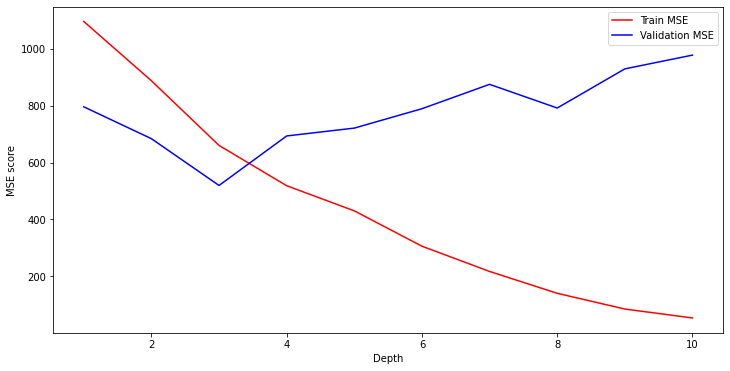

In [27]:
best_depth, train_results, val_results = A3.tuning_max_depth(X_train, y_train, X_val, y_val)
# #plot the max_depth results for the decision tree
plot_MSE_Max_depth()
print('Best max_depth:', best_depth)

 MSE for Decision tree using the test set

In [28]:
dt = DecisionTreeRegressor(max_depth=best_depth)
dt.fit(X_train, y_train)
test_pred = dt.predict(X_test)
test_score = mean_squared_error(y_test, test_pred)
print('MSE train Decision tree', train_results[best_depth])
print('MSE test Decision tree:', test_score)

MSE train Decision tree 518.6226982204402
MSE test Decision tree: 6634.173827967656


Tuning the Random forest and returning the best parms found.

Best max_depth: 4


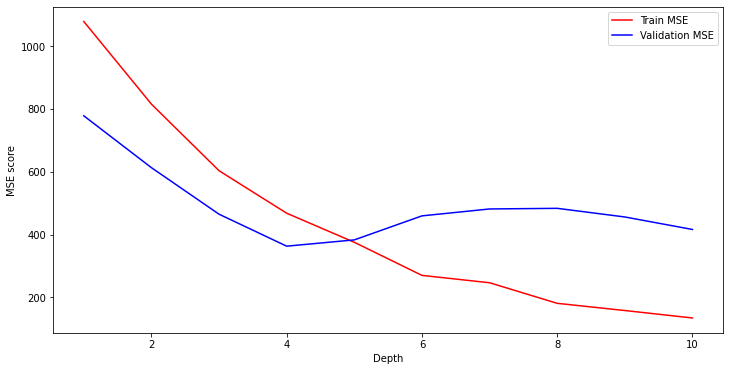

In [29]:
best_depth, train_results, val_results = A3.tuning_max_depth(X_train, y_train, X_val, y_val, pick_tree='rnd', trees=6)
# Plot the max_depth results for the random forest
plot_MSE_Max_depth()
print('Best max_depth:', best_depth)

MSE for Random forest using the test set

In [30]:
rnd = RandomForestRegressor(n_estimators=6, max_depth=best_depth, random_state=10)
rnd.fit(X_train, y_train)
rnd_test_pred = rnd.predict(X_test)
rnd_test_score = mean_squared_error(y_test, rnd_test_pred)
print('MSE train Random forest:', train_results[best_depth])
print('MSE test Random forest:', rnd_test_score)

MSE train Random forest: 375.3464054342756
MSE test Random forest: 8480.668085698431


Tuning the Decision tree when the data set is restricted for cases h = 24

Best max_depth: 6


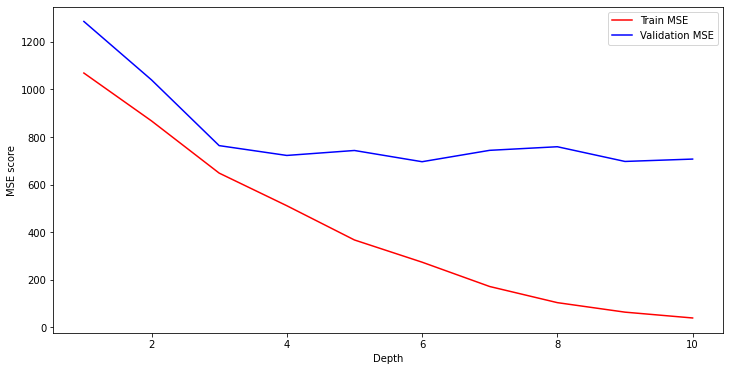

In [31]:
best_depth, train_results, val_results = A3.tuning_max_depth(new_X_train, new_y_train, new_X_val, new_y_val)
# Plot results for the decision tree when data is restricted for cases h = 24
plot_MSE_Max_depth()
print('Best max_depth:', best_depth)

MSE score useing the test set restricted to h = 24

In [32]:
df = DecisionTreeRegressor(max_depth=best_depth)
df.fit(new_X_train, new_y_train)
df_test_pred = df.predict(new_X_test)
df_test_score = mean_squared_error(new_y_test, df_test_pred)
print('MSE train Decision tree restricted(h=24):', train_results[best_depth])
print('MSE test Decision tree restricted(h=24):', df_test_score)

MSE train Decision tree restricted(h=24): 172.027597584687
MSE test Decision tree restricted(h=24): 3372.2739560318087


Tuning the Random forest when data is restricted for cases h=24

Best max_depth: 5


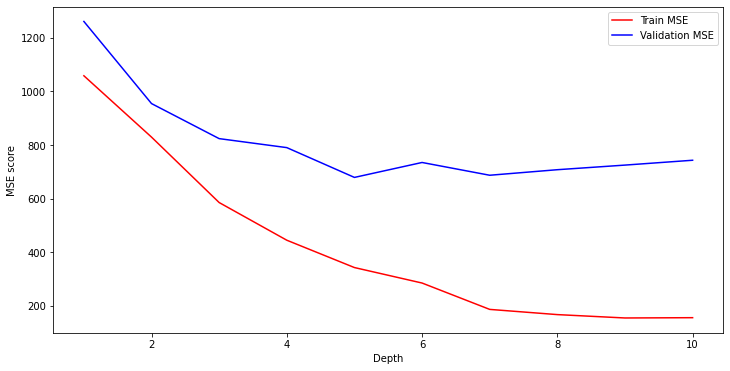

In [33]:
best_depth, train_results, val_results = A3.tuning_max_depth(new_X_train, new_y_train, new_X_val, new_y_val, pick_tree='rnd', trees=6)
#Plot the max_depth results for the random forest
plot_MSE_Max_depth()
print('Best max_depth:', best_depth)

MSE using the test set

In [34]:
rnd = RandomForestRegressor(n_estimators=4, max_depth=best_depth, random_state=10)
rnd.fit(new_X_train, new_y_train)
rnd_test_pred = rnd.predict(new_X_test)
rnd_test_score = mean_squared_error(new_y_test, rnd_test_pred)
print('MSE train Random forest:', train_results[best_depth])
print('MSE test Random forest:', rnd_test_score)


MSE train Random forest: 284.35998829186997
MSE test Random forest: 1500.0471680547514


The result improved significantly when data is restricted for cases h = 24